# Distribution

This notebook demonstrates our processing of FPI distribution functions and implementation of plasma moments integration routines. 

## Data sync

First, we need to sync the data for a test time range. In this example, we choose the 2017 July 26 turbulent reconnection event.

In [3]:
from mms_survey.sync import (
    SyncFgm,
    SyncEdpDce,
    SyncFpiDistribution,
    SyncFpiMoments,
    SyncFpiPartialMoments,
)
from mms_survey.utils.io import data_dir, work_dir

start_date = "2017-07-26T07:26:00"
end_date = "2017-07-26T07:30:00"
probe = "mms2"
data_rate = "brst"

kw = dict(
    start_date=start_date,
    end_date=end_date,
    probe=probe,
    data_rate=data_rate,
    update_local=False,
    store=(data_store := (data_dir / "diagnostics" / "distribution")),
)
SyncFgm(**kw).sync()
SyncEdpDce(**kw).sync()
for synchronizer in [SyncFpiDistribution, SyncFpiMoments, SyncFpiPartialMoments]:
    synchronizer(data_type=["ion", "elc"], **kw).sync()

2023-11-07 14:20:08,208 [INFO]: Downloading 1 files with total size = 0.0026 Gbyte, will be compressed to 0.0007 Gbyte


  0%|                                                                                                                            | 0/1 [00:00<?, ?it/s]

2023-11-07 14:20:08,211 [INFO]: Data from mms2_fgm_brst_l2_20170726072613_v5.98.0.cdf is up-to-date


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 399.08it/s]

2023-11-07 14:20:08,247 [INFO]: Downloading 1 files with total size = 0.0908 Gbyte, will be compressed to 0.0261 Gbyte



  0%|                                                                                                                            | 0/1 [00:00<?, ?it/s]

2023-11-07 14:20:08,250 [INFO]: Data from mms2_edp_brst_l2_dce_20170726072613_v3.0.0.cdf is up-to-date


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 543.30it/s]

2023-11-07 14:20:08,302 [INFO]: Downloading 2 files with total size = 0.2697 Gbyte, will be compressed to 0.2697 Gbyte



  0%|                                                                                                                            | 0/2 [00:42<?, ?it/s]

2023-11-07 14:20:50,615 [INFO]: Processed mms2_fpi_brst_l2_dis-dist_20170726072613_v3.3.0.cdf


 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [02:12<00:42, 42.31s/it]

2023-11-07 14:22:21,199 [INFO]: Processed mms2_fpi_brst_l2_des-dist_20170726072613_v3.3.0.cdf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [02:12<00:00, 66.45s/it]

2023-11-07 14:22:21,258 [INFO]: Downloading 2 files with total size = 0.0210 Gbyte, will be compressed to 0.0210 Gbyte



  0%|                                                                                                                            | 0/2 [00:00<?, ?it/s]

2023-11-07 14:22:22,059 [INFO]: Processed mms2_fpi_brst_l2_dis-moms_20170726072613_v3.3.0.cdf


 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:03<00:00,  1.25it/s]

2023-11-07 14:22:24,472 [INFO]: Processed mms2_fpi_brst_l2_des-moms_20170726072613_v3.3.0.cdf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:03<00:00,  1.61s/it]

2023-11-07 14:22:24,533 [INFO]: Downloading 2 files with total size = 0.0493 Gbyte, will be compressed to 0.0493 Gbyte



  0%|                                                                                                                            | 0/2 [00:01<?, ?it/s]

2023-11-07 14:22:25,673 [INFO]: Processed mms2_fpi_brst_l2_dis-partmoms_20170726072613_v3.3.0.cdf


 50%|██████████████████████████████████████████████████████████                                                          | 1/2 [00:06<00:01,  1.14s/it]

2023-11-07 14:22:30,769 [INFO]: Processed mms2_fpi_brst_l2_des-partmoms_20170726072613_v3.3.0.cdf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.12s/it]


Then, we load all the available datasets

In [4]:
import xarray as xr

kw = dict(engine="zarr", combine="nested", consolidated=False, combine_attrs="drop_conflicts")

ds_fgm = xr.open_mfdataset(str(data_store / probe / "fgm_fields" / data_rate / "l2" / "*"), **kw)
ds_edp = xr.open_mfdataset(str(data_store / probe / "edp_dce" / data_rate / "l2" / "*"), **kw)

ds_ion_dist = xr.open_mfdataset(str(data_store / probe / "fpi_ion_distribution" / data_rate / "l2" / "*"), **kw)
ds_ion_moms = xr.open_mfdataset(str(data_store / probe / "fpi_ion_moments" / data_rate / "l2" / "*"), **kw)
ds_ion_pmoms = xr.open_mfdataset(str(data_store / probe / "fpi_ion_partial_moments" / data_rate / "l2" / "*"), **kw)

ds_elc_dist = xr.open_mfdataset(str(data_store / probe / "fpi_elc_distribution" / data_rate / "l2" / "*"), **kw)
ds_elc_moms = xr.open_mfdataset(str(data_store / probe / "fpi_elc_moments" / data_rate / "l2" / "*"), **kw)
ds_elc_pmoms = xr.open_mfdataset(str(data_store / probe / "fpi_elc_partial_moments" / data_rate / "l2" / "*"), **kw)

In [49]:
import numpy as np
def precondition(ds, E0=100):
    new_ds = ds.copy()
    new_ds = new_ds.assign(U=lambda x: x.W / (x.W + E0))
    
    new_ds = new_ds.reindex(azimuthal_sector=np.arange(33), zenith_sector=np.arange(-1, 17), fill_value=0.0)
    new_ds.phi.loc[dict(azimuthal_sector=32)] = new_ds.phi.sel(azimuthal_sector=0) + 360.0
    new_ds.f3d.loc[dict(azimuthal_sector=32)] = new_ds.f3d.sel(azimuthal_sector=0)
    new_ds.theta.loc[dict(zenith_sector=16)] = 180.0

    return new_ds.compute().transpose("time", "energy_channel", "zenith_sector", "azimuthal_sector", missing_dims="ignore")

#ds_elc_dist = precondition(ds_elc_dist)

print(xr.broadcast(ds_ion_dist))

(<xarray.Dataset>
Dimensions:           (time: 2000, energy_channel: 32, azimuthal_sector: 32,
                       zenith_sector: 16)
Coordinates:
  * azimuthal_sector  (azimuthal_sector) int8 0 1 2 3 4 5 ... 26 27 28 29 30 31
  * energy_channel    (energy_channel) int8 0 1 2 3 4 5 6 ... 26 27 28 29 30 31
  * time              (time) datetime64[ns] 2017-07-26T07:26:13.156740002 ......
  * zenith_sector     (zenith_sector) int8 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    W                 (time, energy_channel, azimuthal_sector, zenith_sector) float32 dask.array<chunksize=(1000, 1, 32, 16), meta=np.ndarray>
    f3d               (time, energy_channel, azimuthal_sector, zenith_sector) float32 dask.array<chunksize=(1000, 1, 32, 16), meta=np.ndarray>
    f3d_err           (time, energy_channel, azimuthal_sector, zenith_sector) float32 dask.array<chunksize=(1000, 1, 32, 16), meta=np.ndarray>
    phi               (time, energy_channel, azimuthal_sector, zenith_sector) float

Then, we apply the background filter to the 3D distribution

In [3]:
import astropy.units as u

from mms_survey.calc.distribution import apply_background_filter

f3d_ion = apply_background_filter(
    "ion",
    ds_ion_dist.f3d,
    ds_ion_dist.W,
    ds_ion_dist.theta,
    ds_ion_dist.phi,
    V_sc=ds_ion_pmoms.V_sc,
    cutoff_energy=60 * u.eV,
)
f3d_elc = apply_background_filter(
    "elc",
    ds_elc_dist.f3d,
    ds_elc_dist.W,
    ds_elc_dist.theta,
    ds_elc_dist.phi,
    V_sc=ds_elc_pmoms.V_sc,
    cutoff_energy=60 * u.eV,
)

### Omni-directional distribution comparison

Now we integrate for the omni-directional distributions

In [4]:
from mms_survey.calc.integrator import integrate_omni

f1d_ion = integrate_omni(
    "ion",
    f3d_ion,
    ds_ion_dist.W,
    ds_ion_dist.theta,
    ds_ion_dist.phi,
    V_sc=ds_ion_pmoms.V_sc,
)
f1d_elc = integrate_omni(
    "elc",
    f3d_elc,
    ds_elc_dist.W,
    ds_elc_dist.theta,
    ds_elc_dist.phi,
    V_sc=ds_elc_pmoms.V_sc,
)

and plot the results

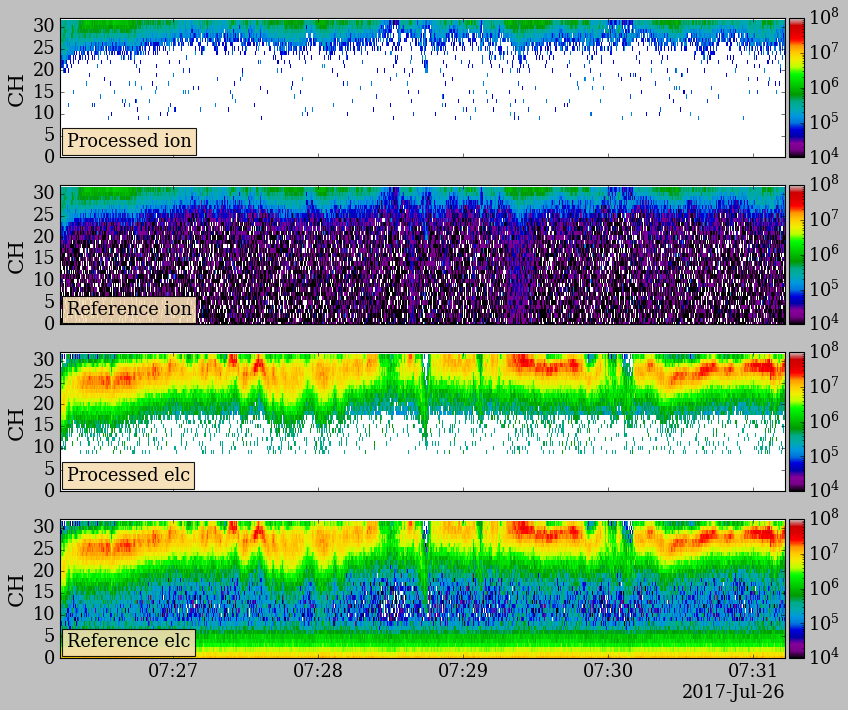

In [5]:
import numpy as np
from tvolib import mpl_utils as mu

t_ion = ds_ion_dist.time.values
W_ion = ds_ion_dist.energy.values
tg_ion, Wg_ion = np.meshgrid(t_ion, W_ion, indexing="ij")

t_elc = ds_elc_dist.time.values
W_elc = ds_elc_dist.energy.values
tg_elc, Wg_elc = np.meshgrid(t_elc, W_elc, indexing="ij")

fig, axes = mu.plt.subplots(4, 1, figsize=(12, 10), sharex=True)
kw = dict(cmap="nipy_spectral", norm=mu.mplc.LogNorm(1e4, 1e8))

cax = mu.add_colorbar(ax := axes[0])
im = ax.pcolormesh(tg_ion, Wg_ion, f1d_ion.values, **kw)
fig.colorbar(im, cax=cax)
mu.add_text(ax, 0.01, 0.08, "Processed ion")

cax = mu.add_colorbar(ax := axes[1])
im = ax.pcolormesh(tg_ion, Wg_ion, ds_ion_moms.f_omni.values, **kw)
fig.colorbar(im, cax=cax)
mu.add_text(ax, 0.01, 0.07, "Reference ion")

cax = mu.add_colorbar(ax := axes[2])
im = ax.pcolormesh(tg_elc, Wg_elc, f1d_elc.values, **kw)
fig.colorbar(im, cax=cax)
mu.add_text(ax, 0.01, 0.08, "Processed elc")

cax = mu.add_colorbar(ax := axes[3])
im = ax.pcolormesh(tg_elc, Wg_elc, ds_elc_moms.f_omni.values, **kw)
fig.colorbar(im, cax=cax)
mu.add_text(ax, 0.01, 0.08, "Reference elc")

for (i, ax) in enumerate(axes):
    mu.format_datetime_axis(ax)
    ax.set_ylim(0, 32)
    ax.set_ylabel("CH")

Next, we calculate all the plasma moments from the 3D distributions (also loading the results from Bob's IDL code)

In [6]:
from mms_survey.calc.integrator import integrate

ds_ion_integrated = integrate(
    "ion",
    f3d_ion,
    ds_ion_dist.W,
    ds_ion_dist.theta,
    ds_ion_dist.phi,
    V_sc=ds_ion_pmoms.V_sc,
)

ds_elc_integrated = integrate(
    "elc",
    f3d_elc,
    ds_elc_dist.W,
    ds_elc_dist.theta,
    ds_elc_dist.phi,
    V_sc=ds_elc_pmoms.V_sc,
)

ref_data = np.loadtxt(work_dir / "resources" / "plasma_moments_bobs_routine.csv", delimiter=",", skiprows=1)
t_ref = (1e9 * ref_data[:, 0]).astype("datetime64[ns]")
N_ref = ref_data[:, 1]
Vx_ref = ref_data[:, 2]
Vy_ref = ref_data[:, 3]
Vz_ref = ref_data[:, 4]
Pxx_ref = ref_data[:, 5]
Pyy_ref = ref_data[:, 6]
Pzz_ref = ref_data[:, 7]
Pxy_ref = ref_data[:, 8]
Pxz_ref = ref_data[:, 9]
Pyz_ref = ref_data[:, 10]

### Density comparison

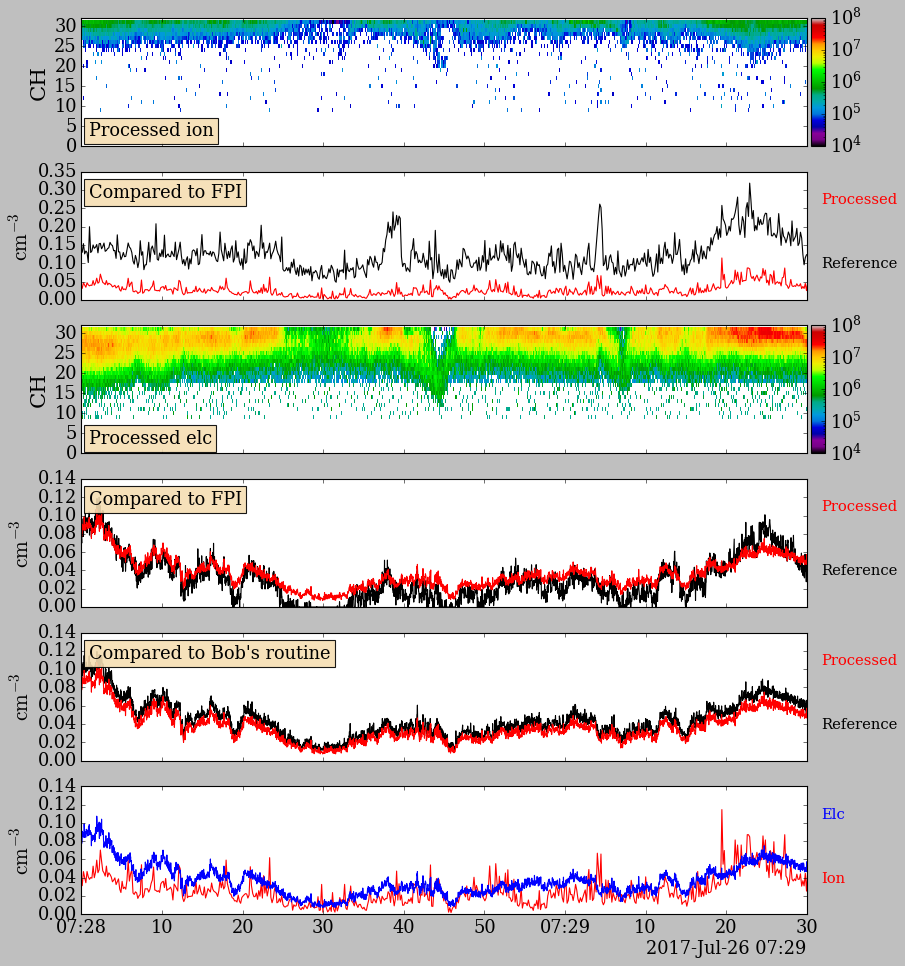

In [7]:
fig, axes = mu.plt.subplots(6, 1, figsize=(12, 14), sharex=True)

cax = mu.add_colorbar(ax := axes[0])
im = ax.pcolormesh(tg_ion, Wg_ion, f1d_ion, **kw)
fig.colorbar(im, cax=cax)
ax.set_ylim(0, 32)
ax.set_ylabel("CH")
mu.add_text(ax, 0.01, 0.08, "Processed ion")

mu.add_colorbar(ax := axes[1]).remove()
ax.plot(t_ion, ds_ion_pmoms.N.sel(energy=3), "-k")
ax.plot(t_ion, ds_ion_integrated.N, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel(f"{u.Unit('cm-3'):latex_inline}")
mu.add_text(ax, 0.01, 0.8, "Compared to FPI")

cax = mu.add_colorbar(ax := axes[2])
im = ax.pcolormesh(tg_elc, Wg_elc, f1d_elc, **kw)
fig.colorbar(im, cax=cax)
ax.set_ylim(0, 32)
ax.set_ylabel("CH")
mu.add_text(ax, 0.01, 0.08, "Processed elc")

mu.add_colorbar(ax := axes[3]).remove()
ax.plot(t_elc, ds_elc_pmoms.N.sel(energy=3), "-k")
ax.plot(t_elc, ds_elc_integrated.N, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel(f"{u.Unit('cm-3'):latex_inline}")
mu.add_text(ax, 0.01, 0.8, "Compared to FPI")

mu.add_colorbar(ax := axes[4]).remove()
ax.plot(t_ref, N_ref, "-k")
ax.plot(t_elc, ds_elc_integrated.N, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel(f"{u.Unit('cm-3'):latex_inline}")
mu.add_text(ax, 0.01, 0.8, "Compared to Bob's routine")

mu.add_colorbar(ax := axes[5]).remove()
ax.plot(t_ion, ds_ion_integrated.N, "-r")
ax.plot(t_elc, ds_elc_integrated.N, "-b")
ax.text(1.02, 0.25, c="r", s="Ion", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="b", s="Elc", transform=ax.transAxes, fontsize="small")
ax.set_ylabel(f"{u.Unit('cm-3'):latex_inline}")

for (i, ax) in enumerate(axes):
    mu.format_datetime_axis(ax)
    ax.set_xlim(np.datetime64("2017-07-26T07:28:00"), np.datetime64("2017-07-26T07:29:30"))

### Velocity comparison

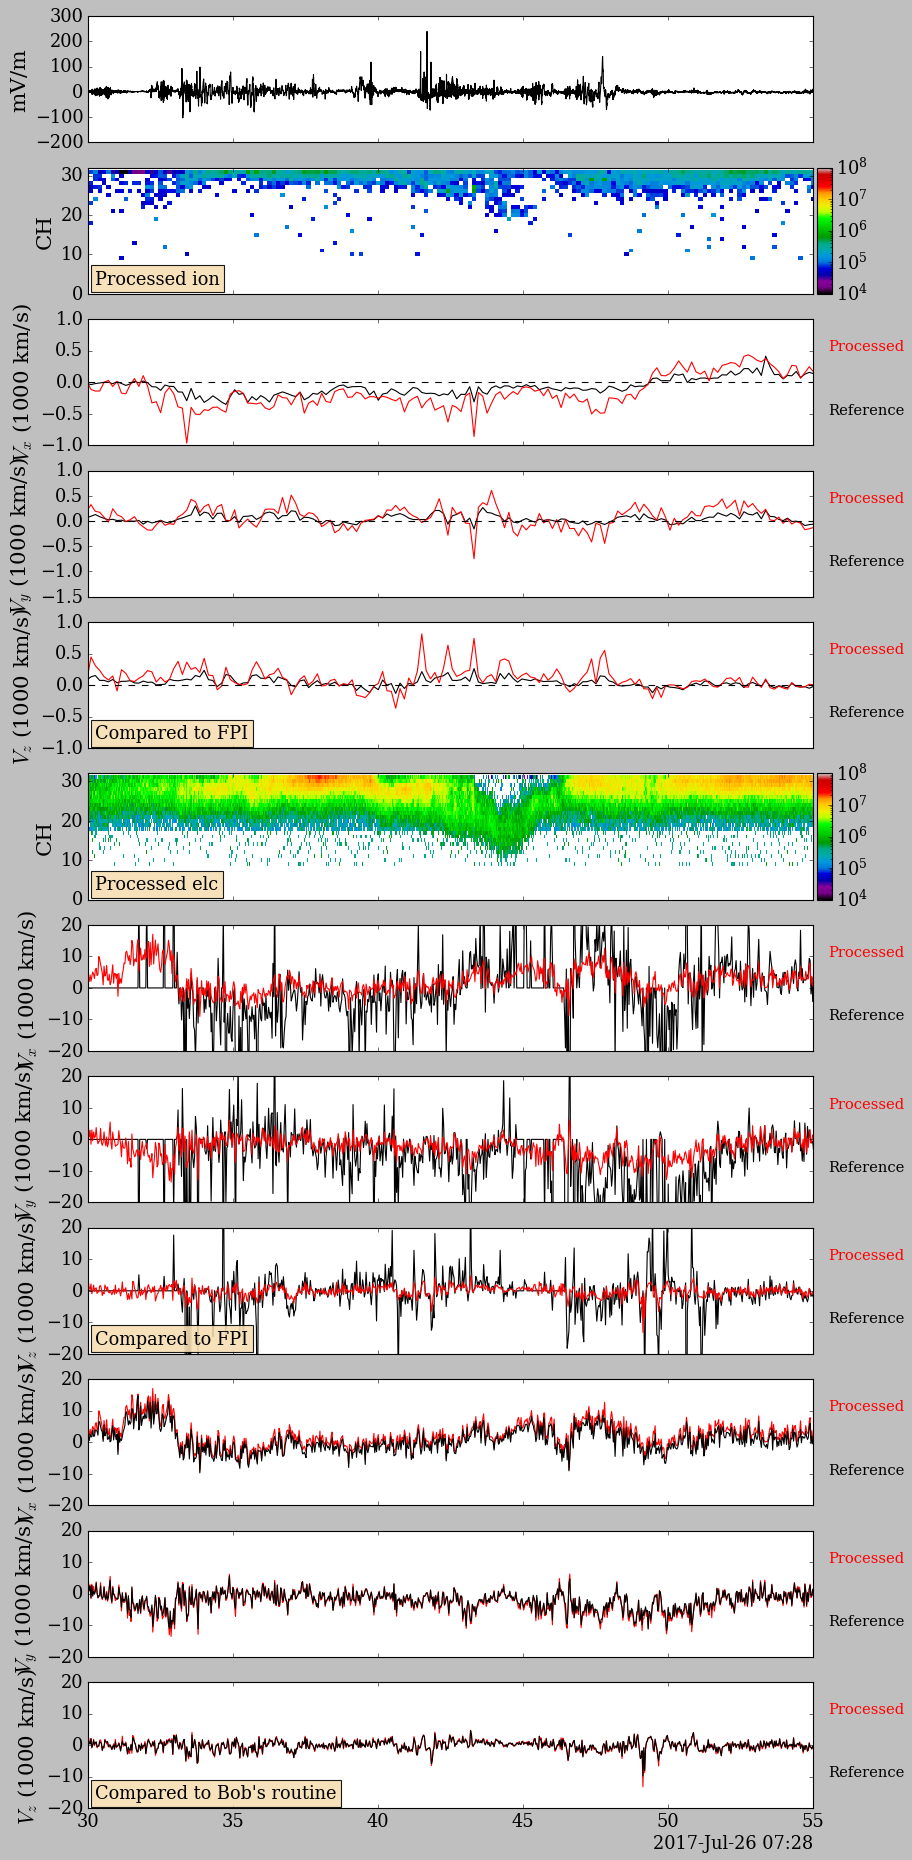

In [8]:
N_elc = ds_elc_integrated.N.interp(time=t_ion)
N_ion = ds_ion_integrated.N
fac = N_ion / N_elc

fig, axes = mu.plt.subplots(12, 1, figsize=(12, 28), sharex=True)

mu.add_colorbar(ax := axes[0]).remove()
ax.plot(ds_edp.time, ds_edp.E_para, "-k")
ax.set_ylabel("mV/m")

cax = mu.add_colorbar(ax := axes[1])
im = ax.pcolormesh(tg_ion, Wg_ion, f1d_ion, **kw)
fig.colorbar(im, cax=cax)
ax.set_ylim(0, 32)
ax.set_ylabel("CH")
mu.add_text(ax, 0.01, 0.08, "Processed ion")

mu.add_colorbar(ax := axes[2]).remove()
ax.plot(t_ion, 1e-3 * ds_ion_moms.V_dbcs.sel(space="x"), "-k")
ax.plot(t_ion, 1e-3 * ds_ion_integrated.V.sel(space="x") * fac, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.axhline(0, c="k", ls="--")
ax.set_ylabel("$V_x$ (1000 km/s)")

mu.add_colorbar(ax := axes[3]).remove()
ax.plot(t_ion, 1e-3 * ds_ion_moms.V_dbcs.sel(space="y"), "-k")
ax.plot(t_ion, 1e-3 * ds_ion_integrated.V.sel(space="y") * fac, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.axhline(0, c="k", ls="--")
ax.set_ylabel("$V_y$ (1000 km/s) ")

mu.add_colorbar(ax := axes[4]).remove()
ax.plot(t_ion, 1e-3 * ds_ion_moms.V_dbcs.sel(space="z"), "-k")
ax.plot(t_ion, 1e-3 * ds_ion_integrated.V.sel(space="z") * fac, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.axhline(0, c="k", ls="--")
ax.set_ylabel("$V_z$ (1000 km/s) ")
mu.add_text(ax, 0.01, 0.08, "Compared to FPI")

cax = mu.add_colorbar(ax := axes[5])
im = ax.pcolormesh(tg_elc, Wg_elc, f1d_elc, **kw)
fig.colorbar(im, cax=cax)
ax.set_ylim(0, 32)
ax.set_ylabel("CH")
mu.add_text(ax, 0.01, 0.08, "Processed elc")

mu.add_colorbar(ax := axes[6]).remove()
ax.plot(t_elc, 1e-3 * ds_elc_pmoms.V_dbcs.sel(space="x", energy=3), "-k")
ax.plot(t_elc, 1e-3 * ds_elc_integrated.V.sel(space="x"), "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel("$V_x$ (1000 km/s) ")
ax.set_ylim(-20, 20)

mu.add_colorbar(ax := axes[7]).remove()
ax.plot(t_elc, 1e-3 * ds_elc_pmoms.V_dbcs.sel(space="y", energy=3), "-k")
ax.plot(t_elc, 1e-3 * ds_elc_integrated.V.sel(space="y"), "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel("$V_y$ (1000 km/s) ")
ax.set_ylim(-20, 20)

mu.add_colorbar(ax := axes[8]).remove()
ax.plot(t_elc, 1e-3 * ds_elc_pmoms.V_dbcs.sel(space="z", energy=3), "-k")
ax.plot(t_elc, 1e-3 * ds_elc_integrated.V.sel(space="z"), "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel("$V_z$ (1000 km/s) ")
ax.set_ylim(-20, 20)
mu.add_text(ax, 0.01, 0.08, "Compared to FPI")

mu.add_colorbar(ax := axes[9]).remove()
ax.plot(t_elc, 1e-3 * ds_elc_integrated.V.sel(space="x"), "-r")
ax.plot(t_ref, 1e-3 * Vx_ref, "-k")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel("$V_x$ (1000 km/s) ")
ax.set_ylim(-20, 20)

mu.add_colorbar(ax := axes[10]).remove()
ax.plot(t_elc, 1e-3 * ds_elc_integrated.V.sel(space="y"), "-r")
ax.plot(t_ref, 1e-3 * Vy_ref, "-k")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel("$V_y$ (1000 km/s) ")
ax.set_ylim(-20, 20)

mu.add_colorbar(ax := axes[11]).remove()
ax.plot(t_elc, 1e-3 * ds_elc_integrated.V.sel(space="z"), "-r")
ax.plot(t_ref, 1e-3 * Vz_ref, "-k")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel("$V_z$ (1000 km/s) ")
ax.set_ylim(-20, 20)
mu.add_text(ax, 0.01, 0.08, "Compared to Bob's routine")

for (i, ax) in enumerate(axes):
    ax.locator_params(axis="y", nbins=5)
    mu.format_datetime_axis(ax)
    ax.set_xlim(np.datetime64("2017-07-26T07:28:30"), np.datetime64("2017-07-26T07:28:55"))

### Stress tensor comparison

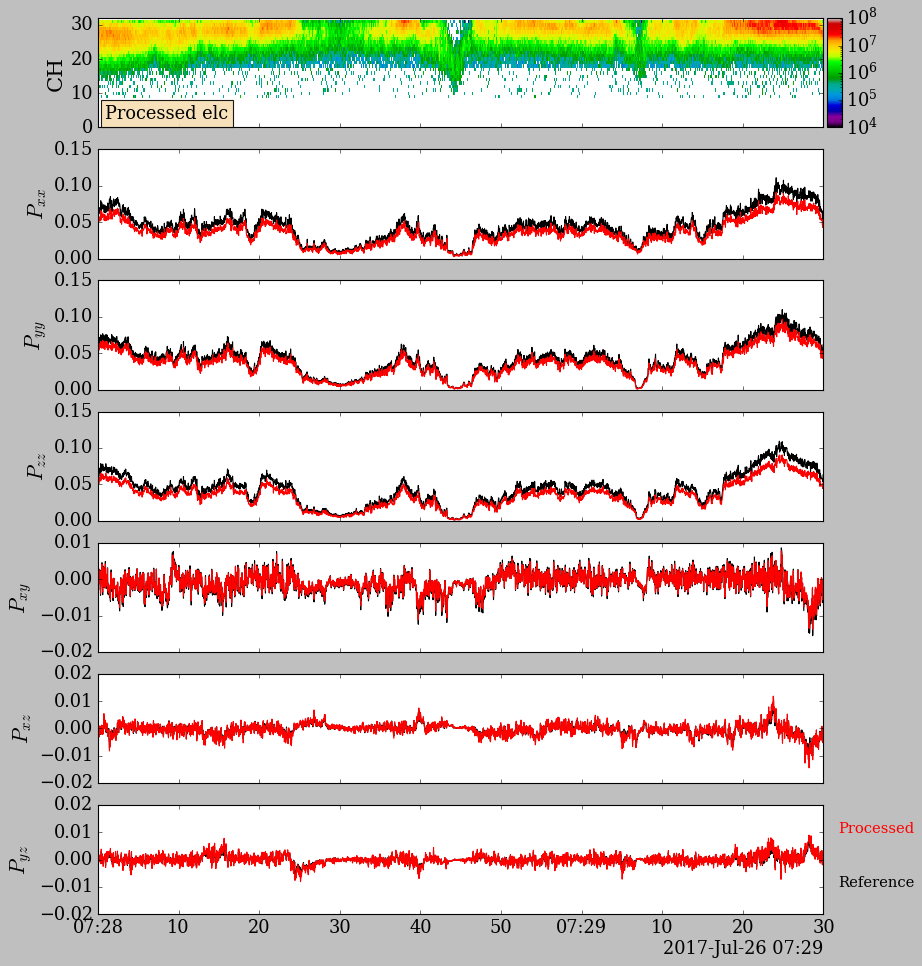

In [20]:
fig, axes = mu.plt.subplots(7, 1, figsize=(12, 14), sharex=True)

cax = mu.add_colorbar(ax := axes[0])
im = ax.pcolormesh(tg_elc, Wg_elc, f1d_elc, **kw)
fig.colorbar(im, cax=cax)
ax.set_ylim(0, 32)
ax.set_ylabel("CH")
mu.add_text(ax, 0.01, 0.08, "Processed elc")

mu.add_colorbar(ax := axes[1]).remove()
ax.plot(t_ref, 1e9 * Pxx_ref, "-k")
ax.plot(t_elc, ds_elc_integrated.Pxx, "-r")
ax.set_ylabel("$P_{xx}$")

mu.add_colorbar(ax := axes[2]).remove()
ax.plot(t_ref, 1e9 * Pyy_ref, "-k")
ax.plot(t_elc, ds_elc_integrated.Pyy, "-r")
ax.set_ylabel("$P_{yy}$")

mu.add_colorbar(ax := axes[3]).remove()
ax.plot(t_ref, 1e9 * Pzz_ref, "-k")
ax.plot(t_elc, ds_elc_integrated.Pzz, "-r")
ax.set_ylabel("$P_{zz}$")

mu.add_colorbar(ax := axes[4]).remove()
ax.plot(t_ref, 1e9 * Pxy_ref, "-k")
ax.plot(t_elc, ds_elc_integrated.Pxy, "-r")
ax.set_ylabel("$P_{xy}$")

mu.add_colorbar(ax := axes[5]).remove()
ax.plot(t_ref, 1e9 * Pxz_ref, "-k")
ax.plot(t_elc, ds_elc_integrated.Pxz, "-r")
ax.set_ylabel("$P_{xz}$")

mu.add_colorbar(ax := axes[6]).remove()
ax.plot(t_ref, 1e9 * Pyz_ref, "-k")
ax.plot(t_elc, ds_elc_integrated.Pyz, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.set_ylabel("$P_{yz}$")

for (i, ax) in enumerate(axes):
    ax.locator_params(axis="y", nbins=5)
    mu.format_datetime_axis(ax)
    ax.set_xlim(np.datetime64("2017-07-26T07:28:00"), np.datetime64("2017-07-26T07:29:30"))

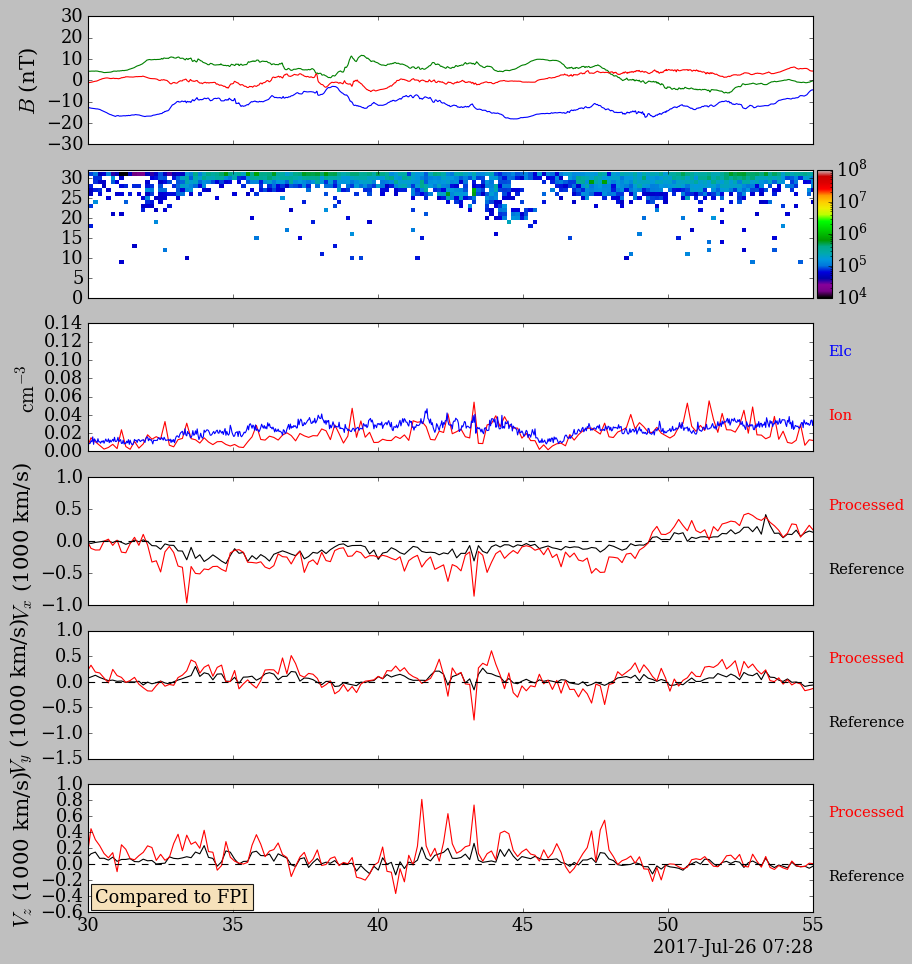

In [22]:
fig, axes = mu.plt.subplots(6, 1, figsize=(12, 14), sharex=True)

mu.add_colorbar(ax := axes[0]).remove()
ax.plot(ds_fgm.time, ds_fgm.B_gse.sel(space="x"), "-b")
ax.plot(ds_fgm.time, ds_fgm.B_gse.sel(space="y"), "-g")
ax.plot(ds_fgm.time, ds_fgm.B_gse.sel(space="z"), "-r")
ax.set_ylabel("$B$ (nT)")

cax = mu.add_colorbar(ax := axes[1])
im = ax.pcolormesh(tg_ion, Wg_ion, f1d_ion.values, cmap="nipy_spectral", norm=mu.mplc.LogNorm(1e4, 1e8))
fig.colorbar(im, cax=cax)
ax.set_ylim(0, 32)

mu.add_colorbar(ax := axes[2]).remove()
ax.plot(t_ion, ds_ion_integrated.N, "-r")
ax.plot(t_elc, ds_elc_integrated.N, "-b")
ax.text(1.02, 0.25, c="r", s="Ion", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="b", s="Elc", transform=ax.transAxes, fontsize="small")
ax.set_ylabel(f"{u.Unit('cm-3'):latex_inline}")

mu.add_colorbar(ax := axes[3]).remove()
ax.plot(t_ion, 1e-3 * ds_ion_moms.V_dbcs.sel(space="x"), "-k")
ax.plot(t_ion, 1e-3 * ds_ion_integrated.V.sel(space="x") * fac, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.axhline(0, c="k", ls="--")
ax.set_ylabel("$V_x$ (1000 km/s)")

mu.add_colorbar(ax := axes[4]).remove()
ax.plot(t_ion, 1e-3 * ds_ion_moms.V_dbcs.sel(space="y"), "-k")
ax.plot(t_ion, 1e-3 * ds_ion_integrated.V.sel(space="y") * fac, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.axhline(0, c="k", ls="--")
ax.set_ylabel("$V_y$ (1000 km/s) ")

mu.add_colorbar(ax := axes[5]).remove()
ax.plot(t_ion, 1e-3 * ds_ion_moms.V_dbcs.sel(space="z"), "-k")
ax.plot(t_ion, 1e-3 * ds_ion_integrated.V.sel(space="z") * fac, "-r")
ax.text(1.02, 0.25, c="k", s="Reference", transform=ax.transAxes, fontsize="small")
ax.text(1.02, 0.75, c="r", s="Processed", transform=ax.transAxes, fontsize="small")
ax.axhline(0, c="k", ls="--")
ax.set_ylabel("$V_z$ (1000 km/s) ")
mu.add_text(ax, 0.01, 0.08, "Compared to FPI")

for (i, ax) in enumerate(axes):
    mu.format_datetime_axis(ax)
    ax.set_xlim(np.datetime64("2017-07-26T07:28:30"), np.datetime64("2017-07-26T07:28:55"))